# Linear Algebra Basics: Intuition and Python Applications
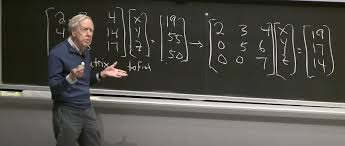
> "Matrices Act. They don't just sit there" - Gilbert Strang

## 1. Introduction

Linear algebra is foundational to data science, machine learning, and deep learning, providing the mathematical framework necessary for managing, transforming, and interpreting complex data. 

In data science, linear algebra enables efficient handling of large datasets and is essential for tasks like data transformation, feature extraction, and dimensionality reduction. 
Machine learning models—ranging from simple linear regressions to complex neural networks—rely on linear algebra to perform calculations over high-dimensional data, enabling algorithms to learn patterns and make predictions. 
Deep learning, in particular, depends heavily on linear algebra due to the massive computations required to process and update weights across layers of neurons. 

Matrix operations such as multiplication, transposition, and decomposition form the backbone of these processes, making it possible to optimize models efficiently and at scale. 
This notebook provides a structured introduction to the linear algebra concepts most relevant to practical use.

See this [post](https://jonathan-hui.medium.com/machine-learning-linear-algebra-a5b1658f0151) by Jonathan Hui for an in-depth introduction.

## 2. Matrix Operations

Matrix operations form the building blocks of many data transformations and calculations in data science, machine learning, and deep learning. 

Understanding how matrices behave under different operations allows us to perform tasks such as transforming datasets, calculating distances, and optimizing functions in machine learning models.

### Basic Properties of Matrix Operations

1. **Distributive Property**: Matrix multiplication distributes over matrix addition.
   - $A(B + C) = AB + AC$

2. **Associative Property**: The order of operations does not change the result in a series of matrix multiplications.
   - $A(BC) = (AB)C$

3. **Commutative Property (for addition only)**: Matrix addition is commutative, but matrix multiplication is not. 
   - $A + B = B + A$

### Matrix Transpose

The transpose of a matrix is an operation that flips a matrix over its diagonal, transforming the rows into columns and vice versa. The transpose of a matrix $A$ is denoted by $A^T$.

#### Properties of the Transpose:

1. **Double Transpose**: Taking the transpose twice returns the original matrix.
   - $(A^T)^T = A$

2. **Transpose of a Sum**: The transpose of a sum is equal to the sum of the transposes.
   - $(A + B)^T = A^T + B^T$

3. **Transpose of a Product**: The transpose of a product reverses the order of multiplication.
   - $(AB)^T = B^T A^T$

These properties are essential for deriving and simplifying matrix expressions in machine learning, such as calculating gradients and optimizing functions.

In [1]:
import numpy as np

# Define a matrix
A = np.array([[2, 4, 1],
              [1, 3, 0],
              [0, 0, 5]])

# Calculate the rank of the matrix
rank = np.linalg.matrix_rank(A)
print("Rank of A:", rank)

# Calculate the column space by performing a QR decomposition
Q, R = np.linalg.qr(A)
column_space = Q[:, :rank]
print("\nColumn space of A:\n", column_space)

# Calculate the row space by transposing A and performing QR decomposition
Q_row, R_row = np.linalg.qr(A.T)
row_space = Q_row[:, :rank]
print("\nRow space of A:\n", row_space)
# Define example matrices
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

# Distributive property: A(B + C) == AB + AC
distributive_check = np.allclose(np.dot(A, B + B), np.dot(A, B) + np.dot(A, B))
print("Distributive property holds:", distributive_check)

# Transpose of A
A_transpose = np.transpose(A)
print("\nMatrix A: \n", A)
print("\nTranspose of A:\n", A_transpose)

# Property check: (AB)^T == B^T A^T
product_transpose = np.dot(A, B).T
reversed_product_transpose = np.dot(B.T, A.T)
transpose_property_check = np.array_equal(product_transpose, reversed_product_transpose)
print("\nTranspose of the product AB equals B^T A^T:", transpose_property_check)

Rank of A: 3

Column space of A:
 [[-0.89442719 -0.4472136   0.        ]
 [-0.4472136   0.89442719  0.        ]
 [-0.          0.          1.        ]]

Row space of A:
 [[-0.43643578  0.40824829 -0.80178373]
 [-0.87287156 -0.40824829  0.26726124]
 [-0.21821789  0.81649658  0.53452248]]
Distributive property holds: True

Matrix A: 
 [[1 2]
 [3 4]]

Transpose of A:
 [[1 3]
 [2 4]]

Transpose of the product AB equals B^T A^T: True


## 3. Inner and Outer Products

The inner and outer products provide insights into vector relationships, such as measuring similarity, orthogonality, and producing transformations.

### Inner Product

The **inner product** (also known as the dot product) between two vectors $\mathbf{a}$ and $\mathbf{b}$ is a scalar value that measures the degree of alignment between them. In data science, the inner product is often used to compute similarity between feature vectors.

#### Definition:
For two vectors $\mathbf{a}$ and $\mathbf{b}$ of the same dimension, the inner product is defined as:
$$
\langle \mathbf{a}, \mathbf{b} \rangle = \sum_{i=1}^n a_i b_i
$$
This results in a single scalar value. If $\langle \mathbf{a}, \mathbf{b} \rangle = 0$, the vectors $\mathbf{a}$ and $\mathbf{b}$ are orthogonal (perpendicular).

#### Properties of the Inner Product:
1. **Commutative**: $\langle \mathbf{a}, \mathbf{b} \rangle = \langle \mathbf{b}, \mathbf{a} \rangle$
2. **Distributive**: $\langle \mathbf{a}, \mathbf{b} + \mathbf{c} \rangle = \langle \mathbf{a}, \mathbf{b} \rangle + \langle \mathbf{a}, \mathbf{c} \rangle$
3. **Associative with Scalars**: $\langle c\mathbf{a}, \mathbf{b} \rangle = c \langle \mathbf{a}, \mathbf{b} \rangle$

---

### Outer Product

The **outer product** of two vectors, on the other hand, produces a matrix. While the inner product results in a scalar, the outer product is useful for creating higher-dimensional structures, as it results in a matrix that captures relationships between all elements of the vectors.

#### Definition:
For vectors $\mathbf{x}$ of dimension $m$ and $\mathbf{y}$ of dimension $n$, the outer product $\mathbf{x} \mathbf{y}^T$ is defined as:

$$
\mathbf{x} \mathbf{y}^T = \begin{bmatrix} x_1 y_1 & x_1 y_2 & \dots & x_1 y_n \\ x_2 y_1 & x_2 y_2 & \dots & x_2 y_n \\ \vdots & \vdots & \ddots & \vdots \\ x_m y_1 & x_m y_2 & \dots & x_m y_n \end{bmatrix}
$$

---

In [2]:
import numpy as np

# Define two vectors
a = np.array([1,0])
b = np.array([0,1])


# Inner product (dot product)
dot = np.dot(a, b)
print("Dot product of a and b: \n", dot, '\n')

# Outer product
outer = np.outer(a, b)
print("Outer product of a and b:\n", outer)

Dot product of a and b: 
 0 

Outer product of a and b:
 [[0 1]
 [0 0]]


## 4. Matrix Derivatives

Matrix derivatives allow us to compute gradients, which are used to optimize functions in machine learning. In this section, we’ll introduce basic matrix derivatives, with a focus on gradients commonly used in machine learning models, such as the mean squared error in linear regression.

### Scalar Derivative

For a scalar function $y = f(x)$, the derivative with respect to $x$ is written as:
$$
\frac{\partial y}{\partial x}
$$

In linear regression, for instance, we often need to compute the derivative of the loss function (e.g., mean squared error) with respect to model parameters to minimize the error.

### Vector Derivative

For a vector $\mathbf{y}$ that depends on a vector $\mathbf{x}$, the derivative is represented by a **Jacobian matrix**, which contains partial derivatives of each element of $\mathbf{y}$ with respect to each element of $\mathbf{x}$.

### Mean Squared Error Example

The Mean Squared Error (MSE) is a commonly used loss function for regression problems, measuring the average squared difference between predicted and true values. 

The gradient of MSE with respect to the model's predictions indicates the direction and magnitude of adjustments needed to minimize error, essential in optimization algorithms like gradient descent.

### Derivation of the MSE Gradient

Given:
- True values vector $\mathbf{y} = [y_1, y_2, \dots, y_n]$
- Predicted values vector $\hat{\mathbf{y}} = [\hat{y}_1, \hat{y}_2, \dots, \hat{y}_n]$

The MSE loss function is defined as:
$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2
$$

To minimize this function with respect to $\hat{\mathbf{y}}$, we calculate the partial derivative:
$$
\frac{\partial \text{MSE}}{\partial \hat{\mathbf{y}}} = \frac{1}{n} \sum_{i=1}^n 2(y_i - \hat{y}_i)(-1) = -\frac{2}{n} (y - \hat{y})
$$

This gradient shows the direction and rate of change of the MSE with respect to each element of $\hat{\mathbf{y}}$. When applied in optimization, this gradient helps adjust predictions (or model parameters) to reduce error.

/var/folders/p9/93z3csys0wvdgpmby0q6v4z00000gp/T/ipykernel_17857/2201719716.py:30: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(range(len(error)), error, basefmt=" ", use_line_collection=True)


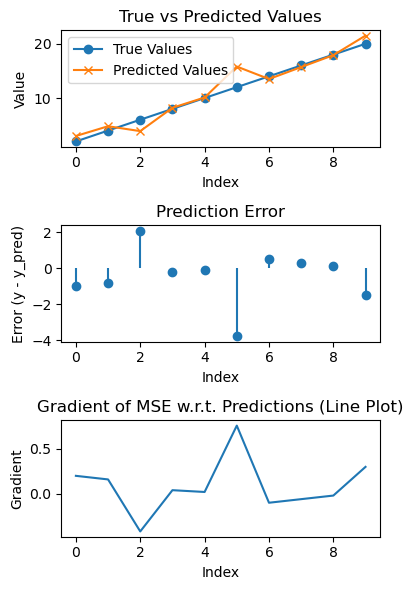

In [3]:
import matplotlib.pyplot as plt

# True values (simulating a larger dataset)
y = np.array([2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20.0])

# Predicted values (simulating model predictions)
y_pred = np.array([3, 4.8, 3.9, 8.2, 10.1, 15.8, 13.5, 15.7, 17.9, 21.5])

# Mean Squared Error (MSE)
mse = np.mean((y - y_pred) ** 2)

# Gradient of MSE with respect to predictions
mse_gradient = -2 * (y - y_pred) / len(y)

# Plotting true vs predicted values
plt.figure(figsize=(4, 6))

# True vs Predicted Values
plt.subplot(3, 1, 1)
plt.plot(y, label='True Values', marker='o')
plt.plot(y_pred, label='Predicted Values', marker='x')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('True vs Predicted Values')
plt.legend()

# Error (Difference) Plot
plt.subplot(3, 1, 2)
error = y - y_pred
plt.stem(range(len(error)), error, basefmt=" ", use_line_collection=True)
plt.xlabel('Index')
plt.ylabel('Error (y - y_pred)')
plt.title('Prediction Error')

# Gradient of MSE with respect to Predictions
plt.subplot(3, 1, 3)
plt.plot(range(len(mse_gradient)), mse_gradient)
plt.xlabel('Index')
plt.ylabel('Gradient')
plt.title('Gradient of MSE w.r.t. Predictions (Line Plot)')


plt.tight_layout()
plt.show()



## 5. Matrix Inverses, Singular Matrices, and Rank

Matrix inversion is a fundamental operation in linear algebra, where we find a matrix that “undoes” the effect of another matrix. Matrix inverses are useful in solving systems of linear equations, where they allow us to isolate variables and obtain solutions. However, not all matrices have inverses. If a matrix does not have an inverse, it is called **singular**.

### Matrix Inverse

For an invertible (or non-singular) matrix $A$, there exists an inverse matrix $A^{-1}$ such that:
$$
A A^{-1} = A^{-1} A = I
$$
where $I$ is the identity matrix. The inverse matrix "reverses" the transformations of the original matrix, making it useful for solving equations of the form $Ax = b$.

To find $x$, we can multiply both sides by $A^{-1}$:
$$
x = A^{-1} b
$$

#### Properties of Inverse Matrices:
1. Only **square matrices** (same number of rows and columns) can have an inverse.
2. A matrix with **determinant 0** is singular and does not have an inverse.
3. The inverse of a product of matrices is the product of their inverses in reverse order:
   $$
   (AB)^{-1} = B^{-1} A^{-1}
   $$

### Singular Matrices

A matrix is **singular** if it does not have an inverse. This occurs when the matrix is not full rank, meaning its rows or columns are linearly dependent. 

For example, if the determinant of a matrix is zero, it is singular. Singular matrices cannot be used to solve systems of equations in the same way as invertible matrices, and we may need other techniques (e.g., pseudoinverse) to handle them.

### Matrix Rank

The **rank** of a matrix is the number of linearly independent rows or columns in the matrix. Rank is a fundamental property that reveals important insights about the structure of a matrix, such as its invertibility and the dimensionality of the space it spans.

#### Definition of Rank
For an $m \times n$ matrix $A$, the rank (often denoted as $\text{rank}(A)$) is defined as:
- The maximum number of **linearly independent columns** of $A$.
- Equivalently, the maximum number of **linearly independent rows** of $A$.

#### Properties of Rank
1. **Full Rank**: If $\text{rank}(A) = \min(m, n)$, the matrix is said to have full rank.
   - For a **square matrix** (where $m = n$), if it has full rank, then $\text{rank}(A) = n$, and the matrix is invertible.
2. **Rank Deficiency**: If $\text{rank}(A) < \min(m, n)$, the matrix is said to be rank deficient.
   - A rank-deficient matrix has linearly dependent rows or columns, indicating redundancy in the data.
3. **Effect on Solutions of Linear Systems**: In a system $Ax = b$:
   - If $\text{rank}(A) = \text{rank}([A | b])$, the system is **consistent** and has at least one solution.
   - If $\text{rank}(A) < \text{rank}([A | b])$, the system is **inconsistent** and has no solution.

#### Determining Rank
The rank of a matrix can be determined by performing **Gaussian elimination** to obtain its row echelon form or by finding its **singular values** (non-zero values in the diagonal of the SVD matrix).

#### Rank and Singular Matrices
For a square matrix $A$:
- If $\text{rank}(A) = n$, the matrix is **invertible** and non-singular.
- If $\text{rank}(A) < n$, the matrix is **singular** and does not have an inverse.

#### Practical Importance of Rank
- **Data Analysis**: In datasets, the rank of a feature matrix indicates the number of linearly independent features. High-dimensional data often has low rank due to correlations among features.
- **Linear Regression**: In regression models, rank deficiency in the design matrix (due to collinearity among features) leads to issues with parameter estimation.
- **Principal Component Analysis (PCA)**: The rank of the covariance matrix represents the effective dimensionality of the data, with higher-rank matrices containing more independent directions of variance.


In [4]:
# Define an invertible (non-singular) matrix
A = np.array([[2, 3],
              [1, 4]])

print("A:\n", A,"\n")

# Define a singular matrix
B = np.array([[2, 4],
              [1, 2]])

print("B:\n", B,"\n")

# Define a 3x3 full-rank matrix
C = np.array([[1, 2, 3],
              [0, 1, 4],
              [5, 6, 0]])

print("C:\n", C,"\n")

# Calculate the inverse of the non-singular matrix A
A_inv = np.linalg.inv(A)
print("Inverse of A:\n", A_inv)


# Calculate the inverse of the singular matrix B
try:
    B_inv = np.linalg.inv(B)
    print("Inverse of B:\n", B_inv)
except np.linalg.LinAlgError:
    print("\nMatrix B is singular and does not have an inverse.")

# Calculate ranks
rank_B = np.linalg.matrix_rank(B)
rank_C = np.linalg.matrix_rank(C)

print("\nRank of matrix B (rank-deficient):", rank_B)
print("\nRank of matrix C (full rank):", rank_C)



A:
 [[2 3]
 [1 4]] 

B:
 [[2 4]
 [1 2]] 

C:
 [[1 2 3]
 [0 1 4]
 [5 6 0]] 

Inverse of A:
 [[ 0.8 -0.6]
 [-0.2  0.4]]

Matrix B is singular and does not have an inverse.

Rank of matrix B (rank-deficient): 1

Rank of matrix C (full rank): 3



## 6. Row Space, Column Space, and Null Space

In linear algebra, the concepts of row space, column space, and null space provide insight into the structure of a matrix and the solutions to linear equations. Each of these spaces represents a different aspect of the matrix and is essential for analyzing linear systems and further understanding the concept of rank.

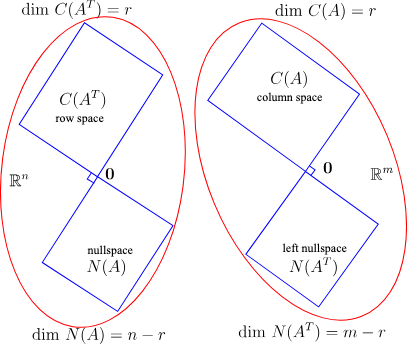

### Column Space (Range)

The **column space** of a matrix $A$, also known as the **range** or **image**, is the set of all possible linear combinations of the columns of $A$. It represents all vectors that can be reached by multiplying $A$ with some vector $x$.

For an $m \times n$ matrix $A$, the column space is a subspace of $\mathbb{R}^m$ and consists of all vectors $b$ for which there exists a solution to $Ax = b$.

Mathematically, the column space of $A$ is defined as:
$$
\text{Col}(A) = \{ b \in \mathbb{R}^m \mid b = Ax \text{ for some } x \in \mathbb{R}^n \}
$$

### Row Space

The **row space** of a matrix $A$ is the set of all possible linear combinations of the rows of $A$. It represents all vectors that can be formed from the linear combinations of the rows of $A$. The row space of $A$ is a subspace of $\mathbb{R}^n$.

For an $m \times n$ matrix $A$, the row space is defined as:
$$
\text{Row}(A) = \{ y \in \mathbb{R}^n \mid y = A^T z \text{ for some } z \in \mathbb{R}^m \}
$$

### Null Space (Kernel)

The **null space** of a matrix $A$, also known as the **kernel**, is the set of all vectors $x$ such that $Ax = 0$. It represents the solutions to the homogeneous equation $Ax = 0$ and describes all vectors that are mapped to the zero vector by $A$.

For an $m \times n$ matrix $A$, the null space is defined as:
$$
\text{Null}(A) = \{ x \in \mathbb{R}^n \mid Ax = 0 \}
$$

The dimension of the null space is called the **nullity** of $A$. If the null space contains only the zero vector, the matrix $A$ is said to be **full rank**.

---

### Properties and Relationships

1. **Dimension and Rank**:
   - The **dimension** of the column space is equal to the **rank** of $A$.
   - The **dimension** of the row space is also equal to the **rank** of $A$.
   
2. **Orthogonal Complements**:
   - In the context of an $m \times n$ matrix $A$:
     - The **null space** of $A$ is the orthogonal complement of the row space in $\mathbb{R}^n$.
     - The **left null space** (the null space of $A^T$) is the orthogonal complement of the column space in $\mathbb{R}^m$.
   
3. **Fundamental Subspaces**:
   - For an $m \times n$ matrix $A$, there are four fundamental subspaces:
     1. Column space ($\text{Col}(A)$)
     2. Row space ($\text{Row}(A)$)
     3. Null space ($\text{Null}(A)$)
     4. Left null space ($\text{Null}(A^T)$)

These subspaces provide insight into the solutions of the linear system $Ax = b$. For example:
- If $b$ is in the column space of $A$, then $Ax = b$ has at least one solution.
- The null space of $A$ describes all solutions to the homogeneous system $Ax = 0$.


In [5]:
from scipy.linalg import null_space
import numpy as np

# Define a matrix
A = np.array([[2, 4, 1],
              [1, 3, 0],
              [0, 0, 5]])

# Calculate the rank of the matrix
rank = np.linalg.matrix_rank(A)
print("Rank of A:", rank)

# Calculate the column space by performing a QR decomposition
Q, R = np.linalg.qr(A)
column_space = Q[:, :rank]
print("\nColumn space of A:\n", np.round(column_space, 2))

# Calculate the row space by transposing A and performing QR decomposition
Q_row, R_row = np.linalg.qr(A.T)
row_space = Q_row[:, :rank]
print("\nRow space of A:\n", np.round(row_space, 2))

print("\nNull space of A:", "[]")


Rank of A: 3

Column space of A:
 [[-0.89 -0.45  0.  ]
 [-0.45  0.89  0.  ]
 [-0.    0.    1.  ]]

Row space of A:
 [[-0.44  0.41 -0.8 ]
 [-0.87 -0.41  0.27]
 [-0.22  0.82  0.53]]

Null space of A: []


### Rank Interpretation: 
- The rank of a matrix represents the number of linearly independent rows or columns in the matrix.
- Since the rank is 3, and $A$ is a 3x3 matrix, we know that $A$ is full rank. This means that all rows and columns of $A$ are linearly independent.
- A full-rank matrix in this case implies that $A$ is invertible and has a unique solution for $Ax = b$ if $b$ is in the column space of $A$.

### Column Space Interpretation
- The column space represents all possible linear combinations of the columns of $A$. This subspace spans all possible values of $Ax$ for any vector $x$.
- Since we have a full-rank matrix, the column space spans all of $\mathbb{R}^3$, meaning that any vector in $\mathbb{R}^3$ can be expressed as a linear combination of $A$’s columns.
- The orthonormal basis vectors are approximately:
    - $[0.89, 0.45, 0]$
    - $[-0.45, 0.89, 0]$
    - $[0, 0, 1]$
- These basis vectors indicate that the column space is aligned along these directions in $\mathbb{R}^3$, and they span the entire space since $A$ has full rank.

### Row Space Interpretation
- The row space represents all possible linear combinations of the rows of $A$.
- Since $A$ is full rank, the row space spans all of $\mathbb{R}^3$, meaning that any vector in $\mathbb{R}^3$ can be expressed as a linear combination of $A$’s rows.
- The row space and column space have the same basis vectors in this case because $A$ is full rank and square.
- These basis vectors for the row space (which match those of the column space) imply that any combination of rows can represent any vector in $\mathbb{R}^3$.

### Null Space Interpretation
- The empty null space (only containing the zero vector) indicates that there are no non-zero solutions to the equation $Ax=0$
- This result implies that $A$ is full rank. Since the null space contains only the zero vector, there are no directions in which $A$ "collapses" or maps vectors to zero.
- In practical terms, this means that the matrix $A$ has no redundancy in its rows or columns, and every column and row contributes to the full dimensionality of the space.

## 7. Determinants and Their Properties

The **determinant** is a scalar value associated with a square matrix that provides valuable insights into the matrix’s properties, particularly its invertibility and how it transforms space. 

Determinants have widespread applications in linear algebra, geometry, and data science, especially when understanding transformations, solving linear systems, and calculating areas and volumes.

### Definition of Determinant

For a $2 \times 2$ matrix:
$$
A = \begin{bmatrix} a & b \\ c & d \end{bmatrix}
$$
the determinant of $A$, denoted as $\text{det}(A)$ or $|A|$, is given by:
$$
\text{det}(A) = ad - bc
$$

For a $3 \times 3$ matrix:
$$
A = \begin{bmatrix} a & b & c \\ d & e & f \\ g & h & i \end{bmatrix}
$$
the determinant of $A$ is:
$$
\text{det}(A) = a(ei - fh) - b(di - fg) + c(dh - eg)
$$

In general, determinants for larger matrices can be calculated using cofactor expansion or more efficiently using row-reduction techniques.

### Properties of Determinants

Determinants have several important properties that make them useful in linear algebra and its applications:

1. **Invertibility**:
   - A matrix $A$ is invertible if and only if $\text{det}(A) \neq 0$.
   - If $\text{det}(A) = 0$, the matrix is singular, meaning it does not have an inverse.

2. **Effect on Area and Volume**:
   - For a $2 \times 2$ matrix, the absolute value of the determinant represents the area scaling factor of the transformation defined by the matrix.
   - For a $3 \times 3$ matrix, the absolute value of the determinant represents the volume scaling factor of the transformation.
   - A determinant of 1 or -1 indicates a transformation that preserves area (or volume) but may change orientation.

3. **Row Operations and Determinants**:
   - **Swapping Rows**: Swapping two rows of a matrix multiplies the determinant by $-1$.
   - **Scaling a Row**: Multiplying a row by a scalar $k$ multiplies the determinant by $k$.
   - **Adding a Multiple of One Row to Another**: This operation does not change the determinant.

4. **Determinant of a Product**:
   - For two matrices $A$ and $B$, $\text{det}(AB) = \text{det}(A) \cdot \text{det}(B)$.
   - This property is particularly useful for simplifying calculations in matrix decompositions and transformations.

5. **Determinant of a Transpose**:
   - The determinant of a matrix and its transpose are the same: $\text{det}(A) = \text{det}(A^T)$.


In [6]:
A_2x2 = np.array([[2, 3],
                  [1, 4]])

A_3x3 = np.array([[6, 1, 1],
                  [4, -2, 5],
                  [2, 8, 7]])

# Calculate determinants
det_A_2x2 = np.linalg.det(A_2x2)
det_A_3x3 = np.linalg.det(A_3x3)

# Round for clarity
det_A_2x2 = round(det_A_2x2, 2)
det_A_3x3 = round(det_A_3x3, 2)

print("Determinant of A_2x2:", det_A_2x2)
print("Determinant of A_3x3:", det_A_3x3)

Determinant of A_2x2: 5.0
Determinant of A_3x3: -306.0


# Conclusion: Connecting the Fundamentals of Linear Algebra

In this exploration of linear algebra basics, we’ve covered core concepts essential to understanding matrix transformations, vector properties, and their applications in data science and machine learning. Here’s how each of these foundational topics connects to form a cohesive understanding of linear transformations, matrix properties, and their practical uses.

### 1. Vectors and Vector Spaces

At the heart of linear algebra are **vectors** and **vector spaces**, which define the structure of data and provide a framework for operations like addition and scalar multiplication. Vectors represent directions and points in space, while vector spaces enable us to analyze and manipulate data in multiple dimensions. This understanding is crucial in applications requiring data transformations and feature space analysis.
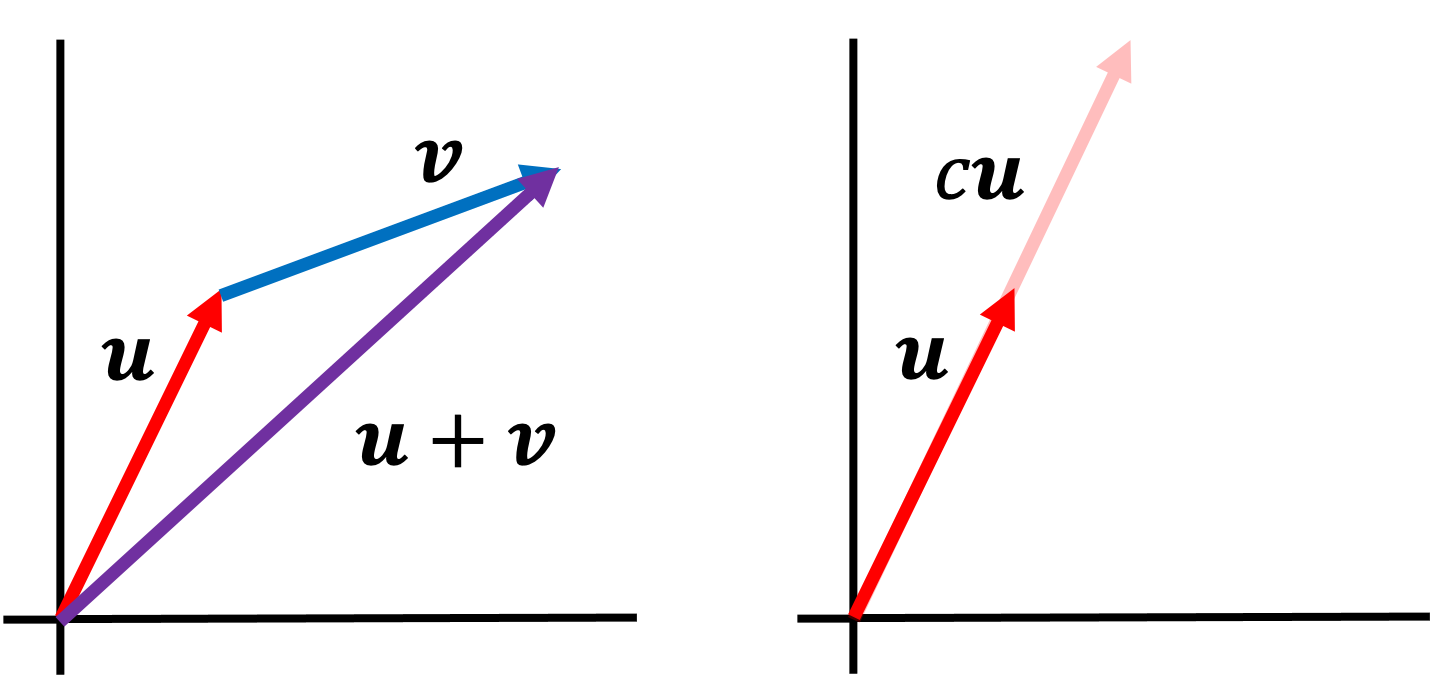

### 2. Matrices and Linear Transformations

**Matrices** act as operators that apply transformations to vectors, performing actions such as scaling, rotating, reflecting, or projecting within vector spaces. Each matrix defines a specific transformation, and matrix operations—such as addition, multiplication, and inversion—allow us to combine, analyze, and invert these transformations. In data science, matrices encode data, apply operations to datasets, and help build models that translate input features into predictions.
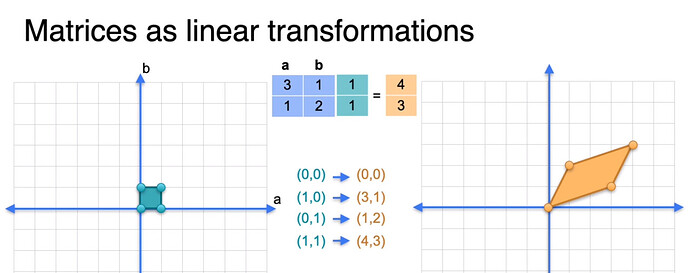

### 3. Rank, Row Space, Column Space, and Null Space

The **rank** of a matrix reveals the matrix’s linear independence and determines the dimension of the **row space** and **column space**. These spaces allow us to understand the scope of a matrix’s transformation and which vectors can be mapped by it. The **null space**, on the other hand, shows all vectors that are mapped to zero, providing insights into the matrix’s redundancy. Together, these subspaces explain the structure and behavior of linear transformations and indicate whether a system of equations has a unique solution.
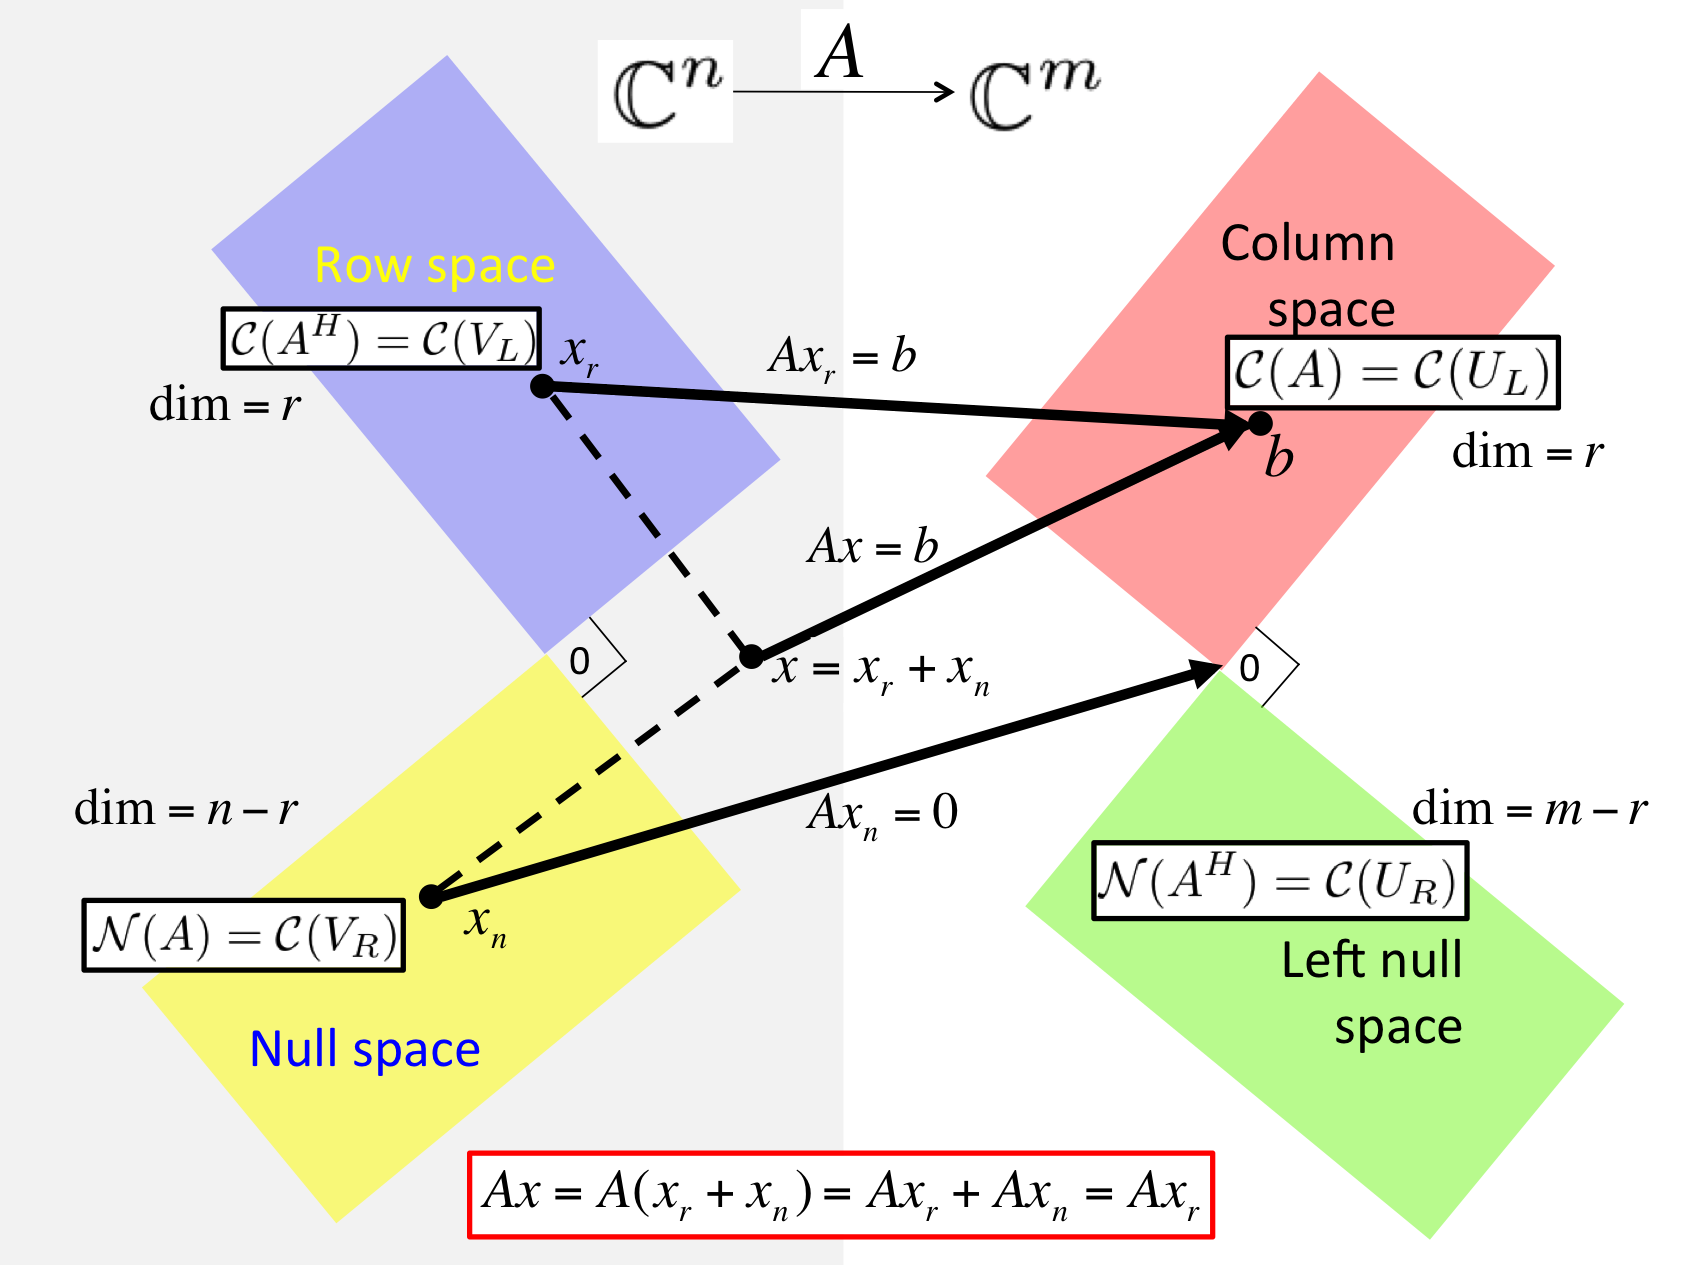

### 4. Determinants and Matrix Invertibility

The **determinant** of a matrix ties directly into its invertibility and scaling properties. A non-zero determinant implies that a matrix is invertible and that its transformation preserves area or volume in space. Determinants are useful in assessing whether a matrix can uniquely solve a system of linear equations and in measuring how transformations impact the geometry of vector spaces, making them essential for transformations in machine learning.
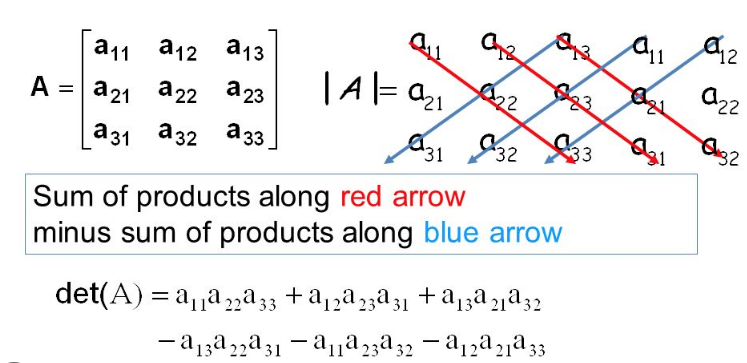

### 5. Derivatives and Optimization

**Derivatives** are crucial in linear algebra when applied to optimization problems, especially in data science and machine learning where model training often involves minimizing loss functions. The derivative of a matrix function (such as the Mean Squared Error) with respect to vector or matrix parameters provides the **gradient**, indicating the direction and rate of change for optimization. By calculating gradients, we can adjust model parameters iteratively to converge on a minimum, improving model accuracy and performance.

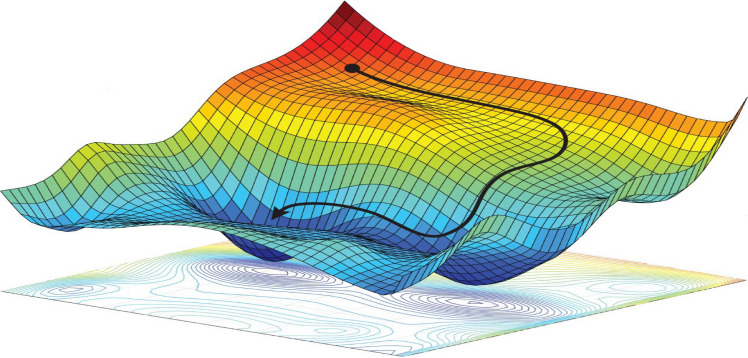